
# [TMDb Movie Analysis ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

### About the Dataset
The dataset was colllected from The Movie Database(TMDd).It contains records of 10,866 movies.More information on the dataset can be accessed on[Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

In [1]:
## load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from matplotlib.pyplot import figure
import seaborn as sns


In [2]:
# load the dataset
data = pd.read_csv("tmdb-movies.csv")
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
data.shape

(10866, 21)

In [4]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The dataset contains 10,866 rows and 21 columns.The `imdb_id` and `id` columns record the idenfitication number of each movie.`popularity` is a rating of how the movies by reviewers.The `budget`,`revenue`,`budget_adj` and `revenue_adj` contain information on the amount ofmoney used and generated by the movies.The last two columns contain the same info as the budget and revenue columns but adjusted to the 2010 levels.The remaining  columns record the title,cast,website,director,tagline,keywords,length of the movie,genres,companies who produced the movie and the release date,number of people who rated the movie,their average and the year the movie was released.

   

### Questions for Analysis
This analysis will utilise this dataset to provide answers to the following questions:

    a) Are movies becoming popular and profitable over time?
    b) What Genres are the most popular?
    c) Is there any relationship between popularity and profit of movies?
    
   

## Data Wrangling
In this  section the data will be wrangled to ensure accuracy and completeness.

In [5]:
## checking for duplicates
data.duplicated().any()


True

In [6]:
data.duplicated().sum()

1

Only one record is a duplicated.This is  minute and we can drop these record without need for further checks.

In [7]:
## drop duplicated row
data.drop_duplicates(inplace = True)
## confirm deletion of duplicate
data.duplicated().any()

False

In [8]:
## check for missing values
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The dataset has alot of missing values! Fortunately columns with chronic  missingness like homepage will not be useful in this analysis.Other extraneous columns like imdb_id,tagline,overview,keyword,revenue and budget will be dropped.For revenue and budget of the movies,we shall utilise the 2010 adjusted values present in the last two columns.The id  and imdb_are similar ths we shall only keep the one without missing values.Release date contains more information than release year thus we hsa;; drop the latter.With these removal the following columns shall be left with missing values;cast,keywords,genres and production_companies.

In [9]:
## Dropping extraneous columns
col_drop = ["imdb_id","budget","revenue","homepage","keywords","tagline","overview","vote_average","cast","production_companies","director"]
data_v1 = data.drop(col_drop,axis = 1)
## confirm reduction of columns to 15
data_v1.shape

(10865, 10)

Missing values in the 'genre' will be filled with `unknown` of each variable to prevent loss of other data.

In [10]:
## fill missing values in genre column with unknown
data_v1['genres'].fillna("unknown",inplace = True)
## confirm changes
data_v1.isnull().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

The `genre` variable contains multiple values.For this analysis we shall require only the first genre.

In [11]:
## extracting the first  genre for each movie
genre = data_v1.genres.str.split('|',expand = True)
data_v1['genre'] = genre[0]
data_v1.head(4)

,id,popularity,original_title,runtime,genres,release_date,vote_count,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015,1.839999e+08,1.902723e+09,Action


In [12]:
## confirm new columns
data_v1.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'genres',
       'release_date', 'vote_count', 'release_year', 'budget_adj',
       'revenue_adj', 'genre'],
      dtype='object')

In [13]:
## dropping the extraneous column
data_v2 = data_v1.drop('genres',axis = 1)
data_v2.tail()

,id,popularity,original_title,runtime,release_date,vote_count,release_year,budget_adj,revenue_adj,genre
10861,21,0.080598,The Endless Summer,95,6/15/66,11,1966,0.000000,0.0,Documentary
10862,20379,0.065543,Grand Prix,176,12/21/66,20,1966,0.000000,0.0,Action
10863,39768,0.065141,Beregis Avtomobilya,94,1/1/66,11,1966,0.000000,0.0,Mystery
10864,21449,0.064317,"What's Up, Tiger Lily?",80,11/2/66,22,1966,0.000000,0.0,Action
10865,22293,0.035919,Manos: The Hands of Fate,74,11/15/66,15,1966,127642.279154,0.0,Horror


In [14]:
data_v2.describe()

,id,popularity,runtime,vote_count,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,2015.000000,4.250000e+08,2.827124e+09


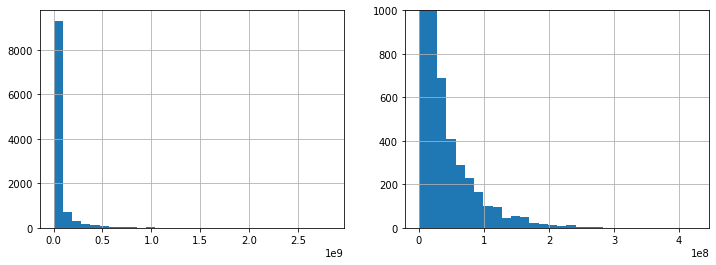

In [15]:
##plotting a histogram of revenue and budget columns
fig,axes = plt.subplots(1,2)
data_v2.revenue_adj.hist( bins = 30 ,ax = axes[0],figsize = (12,4))
data_v2.budget_adj.hist(bins = 30,ax = axes[1])
plt.ylim(0,1000)
plt.show()


The histograms above show that some movies in the dataset contain lots of  zeroes in the columns of budget and revenue.This doesnt make sense.Judging by the skewness of the distributions we should replace the zeros with the median.However, the high number of zeros means that the median is also zero!We shall use the mean instead and disregards its limitations with this distribution.We shall also create a new column to record the profit made from the movies.

In [16]:
## replacing zeroes with the mean in the budegt and revenue columns
var = ["budget_adj","revenue_adj"]
for col in var:
    data_v2[col] = data_v2[col].replace(0,data_v2[col].mean())
## confirming the changes
data_v2[["budget_adj","revenue_adj"]].describe()


,budget_adj,revenue_adj
count,1.086500e+04,1.086500e+04
mean,2.675046e+07,7.981225e+07
std,3.051007e+07,1.365647e+08
min,9.210911e-01,2.370705e+00
25%,1.754989e+07,5.136900e+07
50%,1.754989e+07,5.136900e+07
75%,2.085325e+07,5.136900e+07
max,4.250000e+08,2.827124e+09


In [17]:
## Generating a column for profit
data_v2['profit'] = data_v2.revenue_adj - data_v2.budget_adj
data_v2.profit.describe()

count    1.086500e+04
mean     5.306179e+07
std      1.206776e+08
min     -4.139124e+08
25%      2.017888e+07
50%      3.381911e+07
75%      3.905412e+07
max      2.750137e+09
Name: profit, dtype: float64

In [18]:
data_v2.release_date

0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
           ...   
10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, Length: 10865, dtype: object

Let's change the data type of `id` from `int` to `str`.It isnt very intuitve for it to remain as `int` because we are not going to perform any arithmetic manipulations on it.Additionally the `release_date` variable has been saved as string instead of datetime.Let's correct these incorrect data types in the following cell.

In [19]:
data_v2['id'] = data_v2.id.astype(str)
data_v2['release_date'] = pd.to_datetime(data_v2['release_date'],infer_datetime_format= True)
## confirm data types
data_v2.release_date.tail(10)

10856   2066-02-16
10857   2066-06-10
10858   2066-05-25
10859   2066-10-05
10860   2066-05-20
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

`pd.to_datetime()` has incorrectly read some years.For example the last rows contain movies released in 2066.This erroneous.The function incorrectly years ending in *66*  as 2066 instead of 1966.Fortunately the `release_year` contains the correct year.We shall keep this column and extract the `month` from the `release_date` column.

In [20]:
## extracting the month
data_v2['month'] = pd.DatetimeIndex(data_v2.release_date).month
## extact the months as text
data_v2['month'] = data_v2['month'].apply(lambda x: calendar.month_abbr[x])
#view changes
data_v2.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_count', 'release_year', 'budget_adj', 'revenue_adj', 'genre',
       'profit', 'month'],
      dtype='object')

In [21]:
## drop budget_adj,release_date revenue_adj
data_cleaned = data_v2.drop(["budget_adj","release_date","revenue_adj"], axis = 1)

## EXPLORATORY DATA ANALYSIS
In this section we shall provide answers to our questions using the cleaned dataset

## Are movies becoming more popular and profitable over time

Let's first investigate how the popularity of movies changes across the different months in a year

In [22]:
data_cleaned.groupby('month')['popularity'].mean()

month
Apr    0.562475
Aug    0.584363
Dec    0.750784
Feb    0.589931
Jan    0.460574
Jul    0.747678
Jun    0.800755
Mar    0.642808
May    0.749997
Nov    0.755466
Oct    0.613168
Sep    0.564820
Name: popularity, dtype: float64

It looks like movies released in mid year and towards the end of the year had more average popularity ratings than those released at the start of the year.Lets visualize this relationship using bargraphs.

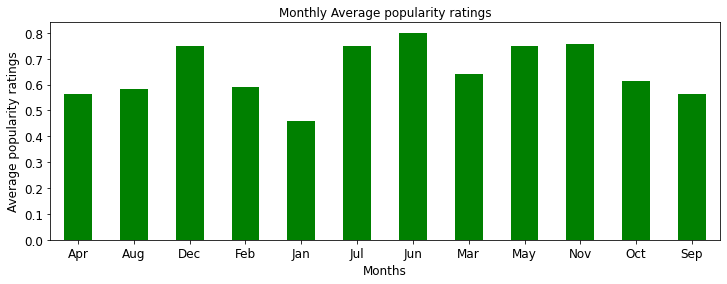

In [23]:
figure(figsize = (12,4))
data_cleaned.groupby('month')['popularity'].mean().sort_index().plot(kind = 'bar',color = 'green')
plt.title("Monthly Average popularity ratings",fontsize = 12)
plt.ylabel("Average popularity ratings",fontsize = 12)
plt.xlabel("Months",fontsize = 12)
plt.xticks(rotation = 0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

In [24]:
## year
data_cleaned.groupby('release_year')['popularity'].mean()


release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.471154
1968    0.484202
1969    0.422778
1970    0.341700
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.447829
1975    0.519445
1976    0.474516
1977    0.626387
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590843
1985    0.584058
1986    0.509545
1987    0.504637
1988    0.465039
1989    0.563658
1990    0.535735
1991    0.501090
1992    0.582913
1993    0.547056
1994    0.668825
1995    0.710722
1996    0.604768
1997    0.712003
1998    0.626165
1999    0.645799
2000    0.546799
2001    0.702658
2002    0.701454
2003    0.719083
2004    0.722438
2005    0.628663
2006    0.606371
2007    0.593161
2008    0.584817
2009    0.600178
2010    0.645058
2011    0.675069
2012    0.607197
2013    0.627627
2014    0.887268
2015    1.030657
Name: popularity, dtype: float64

 Looks like the popularity of movies has increased from the 1960's to 2015.Let's Let's plot these trends.As we shall be plotting trends with the profit variable,we shall define a function `line_plot` to reduce code repetition.The function will take in as inputs the value for the x axis and the variable for the y axis and return a line plot.

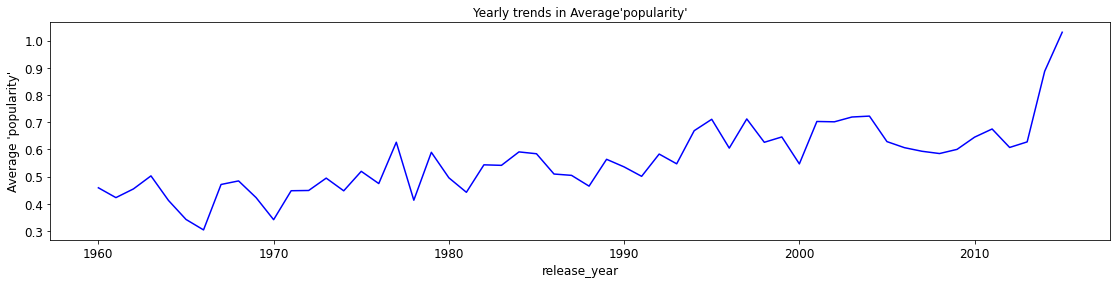

In [37]:
# define a function
def line_plot(var_x,var_y):
    figure(figsize = (19,4))
    data_cleaned.groupby(var_x)[var_y].mean().plot(kind = 'line',color = 'blue')
    plt.title(f"Yearly trends in Average'{var_y}'" ,fontsize = 12)
    plt.ylabel(f"Average '{var_y}'",fontsize = 12)
    plt.xlabel(var_x,fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12);
line_plot("release_year","popularity")

 ## Question two : Determinants of the popularity of a movie
 
  

In [26]:
data_cleaned.groupby('genre')['popularity'].mean().sort_values(ascending = False)

genre
Adventure          1.217868
Science Fiction    1.073096
Fantasy            0.865390
Action             0.836394
Animation          0.810370
War                0.767041
History            0.764636
Family             0.730987
Romance            0.704157
Crime              0.694063
Western            0.690646
Thriller           0.673381
Mystery            0.596896
Drama              0.552446
Comedy             0.537133
Horror             0.468611
Music              0.447730
TV Movie           0.246190
Documentary        0.177023
unknown            0.167966
Foreign            0.167124
Name: popularity, dtype: float64

The top three popular genres are adventure,science fiction and fantasy.The foreign genre is the least popular.The genre 1 contains some erroneus genres like Tv movie and music.These can be further cleaned.We can visualize these result using a bar chart.

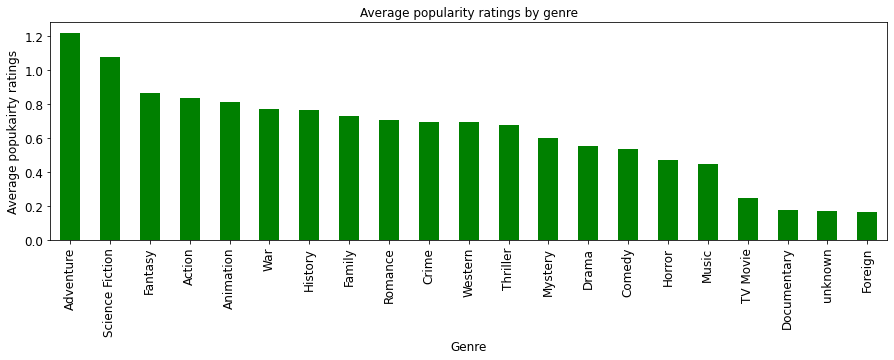

In [27]:
figure(figsize = (15,4))
data_cleaned.groupby('genre')['popularity'].mean().sort_values(ascending = False).plot(kind = 'bar',color = 'green')
plt.title("Average popularity ratings by genre",fontsize = 12)
plt.ylabel("Average popukairty ratings",fontsize = 12)
plt.xlabel("Genre",fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

## Relationshp between popularity, Release_year ,profit and Genre
In this final question,we shall exmine the relationships between popularity,release-year and genre  and the profit of movies.Let's first visualize the trends in the yearly profitability of movies.

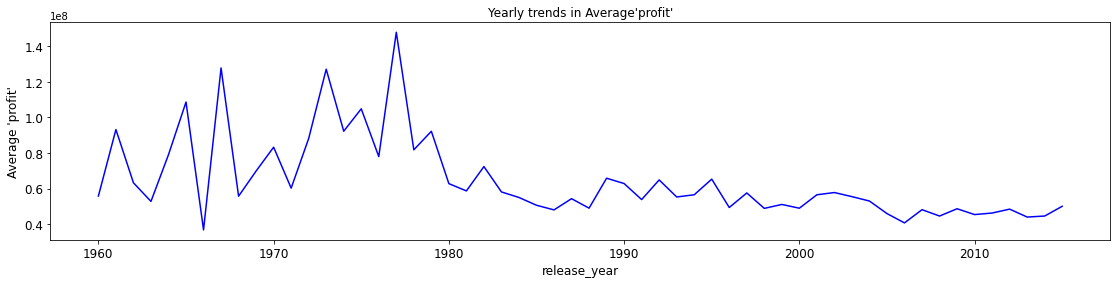

In [38]:
line_plot("release_year","profit")

Whereas we saw earelier that the popularity of movies had increased over the years under review,the profitability of movies decreased from the 1980s to 2015.
Lets summairze the mean profit made by all the movies and group them according to their popularity,genre and release year.We'll view the top 50 movies first and sort them in descending order by their profit.

In [29]:
data_cleaned.groupby(['popularity','genre','release_year'])['profit'].mean().sort_values(ascending = False)[1:50]

popularity  genre            release_year
9.432768    Action           2009            2.586237e+09
4.355219    Drama            1997            2.234714e+09
2.010733    Drama            1973            2.128036e+09
2.563191    Horror           1975            1.878643e+09
2.900556    Science Fiction  1982            1.767968e+09
11.173104   Action           2015            1.718723e+09
1.136610    Crime            1995            1.551568e+09
2.631987    Adventure        1961            1.545635e+09
5.488441    Adventure        1980            1.376998e+09
2.550704    Family           1967            1.319404e+09
2.204926    Adventure        1993            1.293767e+09
32.985763   Action           2015            1.254446e+09
5.738034    Drama            1972            1.246626e+09
7.637767    Science Fiction  2012            1.234248e+09
7.122455    Adventure        2003            1.214855e+09
9.335014    Action           2015            1.210949e+09
4.828854    Adventure        1

There isnt a distinct relationship between popularity and profit with these records.Let's view the 50 least profitable films.


In [30]:
data_cleaned.groupby(['popularity','genre','release_year'])['profit'].mean().sort_values(ascending = False).tail(50)

popularity  genre            release_year
0.530544    Action           1997           -5.977225e+07
0.242797    Comedy           1999           -6.021643e+07
0.455247    Action           2002           -6.070516e+07
1.150934    Adventure        1999           -6.131695e+07
0.111351    Animation        2012           -6.166338e+07
0.782091    Action           1992           -6.186353e+07
0.974222    Adventure        2001           -6.387503e+07
1.689869    Fantasy          2013           -6.397928e+07
0.536259    Comedy           1997           -6.410013e+07
0.606286    Action           2005           -6.483554e+07
0.492559    Thriller         1998           -6.705792e+07
0.491888    Music            1984           -6.731896e+07
0.726521    Science Fiction  2007           -6.828325e+07
0.757082    War              2010           -6.863100e+07
0.651772    Action           1998           -6.902359e+07
0.533292    Drama            1966           -6.955526e+07
0.999866    Science Fiction  1

The relationsip is also not clear.Lets plot a scatterplot of popularity,profit and genre.

Text(0.5, 0, 'Popularity ratings')

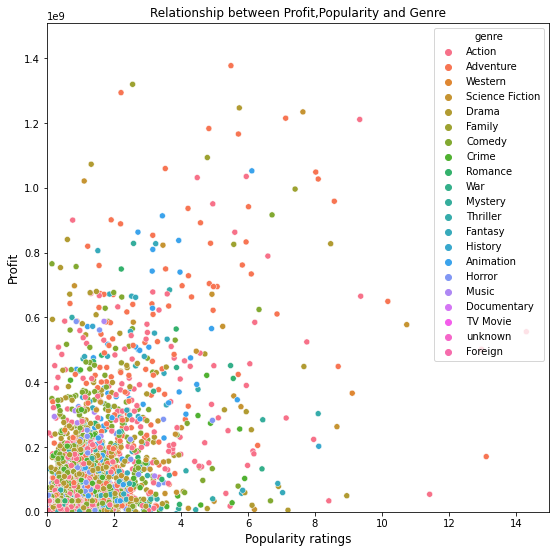

In [31]:
figure(figsize = (9,9))
sns.scatterplot(x = "popularity",y = "profit",hue = 'genre',data = data_cleaned)
## set the limits for both axes to remove outliers
plt.ylim(0,1.51e9)
plt.xlim(0,15)
plt.title("Relationship between Profit,Popularity and Genre",fontsize = 12)
plt.ylabel("Profit",fontsize = 12)
plt.xlabel("Popularity ratings",fontsize = 12)

The plot above shows that there is a strong positive relationship between profit and popularity.Action,adventure and western movies also seem to be  more popular and profitable  compared to the other genres.


## Conclusion
    1) Movies have become popular over the years.These although not explained by the data can be atributed to the development of better movie making technology that allows  the creation of intriguing storylines and visuals that captivate audiences.
    2) The profitability of movies has decreased sharply over the years.This can perhaps be explained by the rise of internet and online movie streaming websites that have diverted audiences from the traditional cinemas.The fact that movies can be easily downloaded and shared by people means that movie production companies lose money as many can now watch movies without neccessarily paying for them
    3)The most popular movie genres are;adventure,science fiction,fantasy and action.
    4)Movies released mid year and towards the holidays had  the highest popularity ratings.
    
## Limitations of this analysis
    1) The presence of many missing values in the budgt and revenue columns(that generated the profit variable) limits the reliability of the above conclusions.Null values were filled with the mean.The means used therefore cannot be relied upon.
    2) No inferential tests were conducted in this analysis to test the above conclusions.
